In [1]:
import pandas as pd
import json
import seaborn as sns
sns.set(rc={"figure.figsize": (20, 10)})

In [2]:
PATH = "../dados/brutos/HIST_PAINEL_COVIDBR_22mai2020.xlsx"

In [3]:
data_df = pd.read_excel(PATH)

In [4]:
data_df["data"] = pd.to_datetime(data_df["data"])
data_df.sort_values(by="data", inplace=True)

In [5]:
data_df.tail()

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,obitosAcumulado,Recuperadosnovos,emAcompanhamentoNovos
67414,Sudeste,SP,Guareí,35,351850.0,35161.0,Itapetininga,2020-05-22,21,18520.0,3,0,NaN,NaN
2307,Norte,RO,Pimenta Bueno,11,110018.0,11002.0,Café,2020-05-22,21,36660.0,7,0,NaN,NaN
42002,Nordeste,BA,Conceição do Coité,29,290840.0,29025.0,Serrinha,2020-05-22,21,66612.0,10,0,NaN,NaN
14049,Nordeste,MA,Lima Campos,21,210600.0,21010.0,Pedreiras,2020-05-22,21,11893.0,110,0,NaN,NaN
100319,Centro-Oeste,GO,NaN,52,520000.0,NaN,NaN,2020-05-22,21,NaN,4,0,NaN,NaN


# Análise do Brasil

In [6]:
brasil_df = data_df[data_df["regiao"] == "Brasil"]

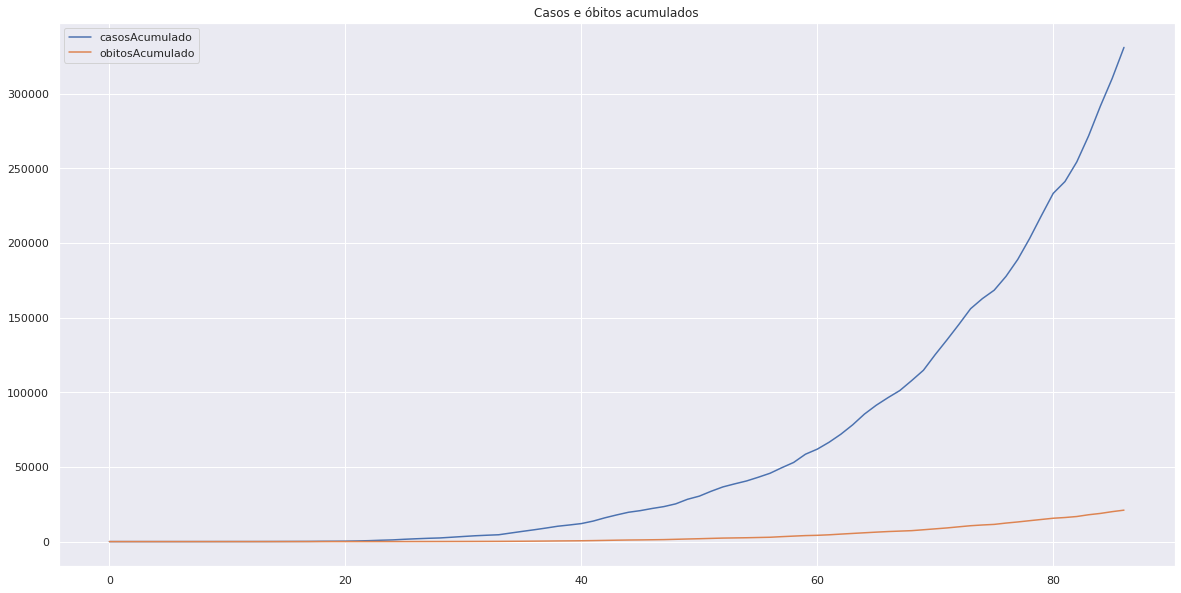

In [7]:
brasil_df[["casosAcumulado", "obitosAcumulado"]].plot(title="Casos e óbitos acumulados")

# Análise de estados

In [8]:
aux_df = data_df[data_df["regiao"] != "Brasil"].groupby(["data", "nomeRegiaoSaude", "estado"]).sum()
aux_df.reset_index(inplace=True)

In [9]:
data_df.columns

Index(['regiao', 'estado', 'municipio', 'coduf', 'codmun', 'codRegiaoSaude',
       'nomeRegiaoSaude', 'data', 'semanaEpi', 'populacaoTCU2019',
       'casosAcumulado', 'obitosAcumulado', 'Recuperadosnovos',
       'emAcompanhamentoNovos'],
      dtype='object')

In [10]:
aux_df = aux_df.groupby(["data", "estado"]).sum()
aux_df.reset_index(inplace=True)

In [11]:
aux_df

,data,estado,coduf,codmun,codRegiaoSaude,semanaEpi,populacaoTCU2019,casosAcumulado,obitosAcumulado,Recuperadosnovos,emAcompanhamentoNovos
0,2020-05-20,AC,228,2280657.0,228040.0,399,852177.0,2817,76,0.0,0.0
1,2020-05-20,AL,2349,23532039.0,2349451.0,1827,3147732.0,4412,248,0.0,0.0
2,2020-05-20,AM,780,7813088.0,780279.0,1260,4094875.0,23704,1561,0.0,0.0
3,2020-05-20,AP,256,2560584.0,256029.0,336,845731.0,4549,142,0.0,0.0
4,2020-05-20,BA,6583,66225218.0,6586305.0,4767,11848999.0,11125,360,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
76,2020-05-22,RS,10879,109094467.0,10883180.0,5313,9884019.0,5918,172,0.0,0.0
77,2020-05-22,SC,7602,76202966.0,7603510.0,3801,6485298.0,6238,99,0.0,0.0
78,2020-05-22,SE,1988,19907272.0,1988305.0,1491,2279775.0,4922,82,0.0,0.0
79,2020-05-22,SP,17465,176090192.0,17513605.0,10479,45053953.0,76815,5773,0.0,0.0


In [12]:
estados_df = aux_df.set_index("data").pivot(columns="estado")

In [13]:
estados_df

coduf                                                    ...  \
estado        AC    AL   AM   AP    BA    CE  DF    ES    GO    MA  ...   
data                                                                ...   
2020-05-20   228  2349  780  256  6583  4140  53  2304  4732  4221  ...   
2020-05-21   228  2376  780  256  6844  4140  53  2368  4888  4242  ...   
2020-05-22   228  2484  780  256  6960  4163  53  2336  5356  4242  ...   

           emAcompanhamentoNovos                                               
estado                        PR   RJ   RN   RO   RR   RS   SC   SE   SP   TO  
data                                                                           
2020-05-20                   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2020-05-21                   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2020-05-22                   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[3 rows x 243 columns]

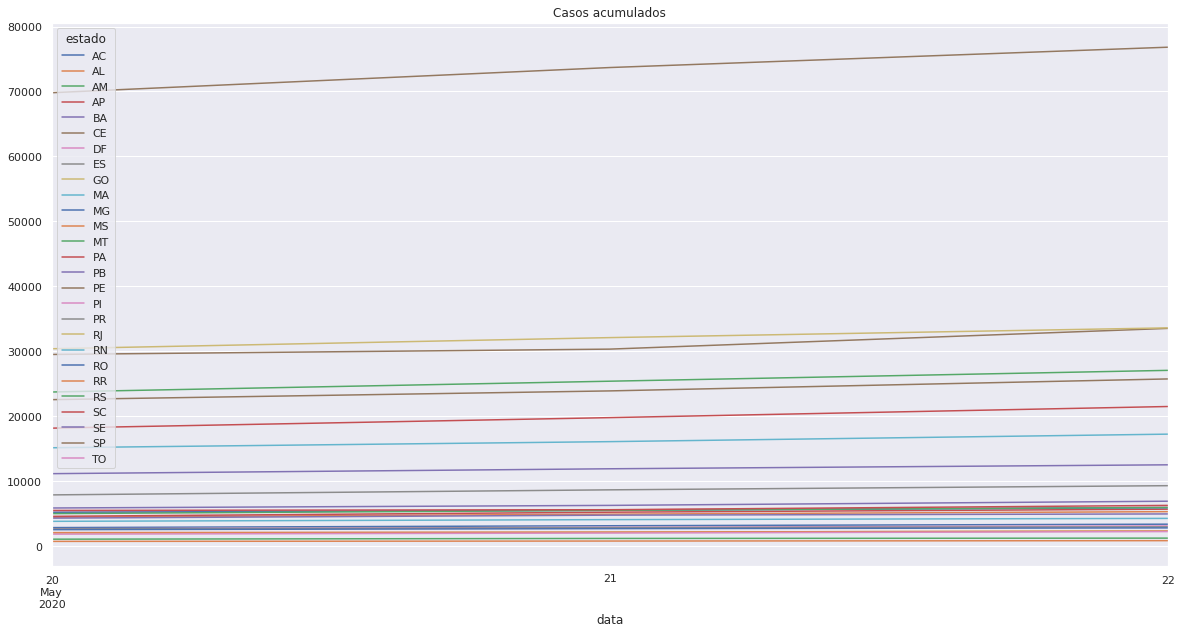

In [14]:
estados_df["casosAcumulado"].plot(title="Casos acumulados")

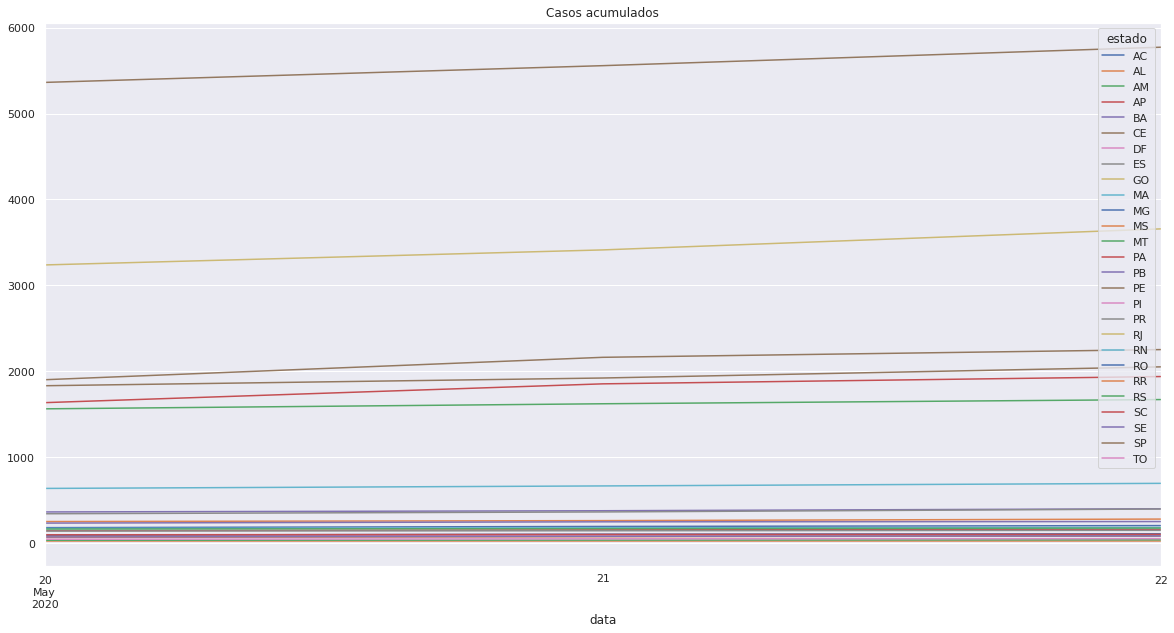

In [15]:
estados_df["obitosAcumulado"].plot(title="Casos acumulados")

# Análise de regiões

In [16]:
regioes_df = data_df[data_df["regiao"] != "Brasil"].groupby(["data", "nomeRegiaoSaude", "regiao"]).sum()

In [17]:
regioes_df.reset_index(inplace=True)
regioes_df = regioes_df.groupby(["data", "regiao"]).sum()

In [18]:
regioes_df.tail(5)

coduf       codmun  codRegiaoSaude  semanaEpi  \
data       regiao                                                        
2020-05-22 Centro-Oeste  11285  113021891.0      11286702.0       4620   
           Nordeste      34519  346394219.0      34531103.0      29127   
           Norte          5330   53461879.0       5331799.0       7728   
           Sudeste       34055  343376228.0      34118445.0      21546   
           Sul           26845  269229516.0      26852977.0      13398   

                         populacaoTCU2019  casosAcumulado  obitosAcumulado  \
data       regiao                                                            
2020-05-22 Centro-Oeste        14144639.0           10249              235   
           Nordeste            52847349.0          113307             6269   
           Norte               17918154.0           64763             4080   
           Sudeste             83437220.0          125544            10025   
           Sul                 26137993.0           15095              417   

                         Recuperadosnovos  emAcompanhamentoNovos  
data       regiao                                                 
2020-05-22 Centro-Oeste               0.0                    0.0  
           Nordeste                   0.0                    0.0  
           Norte                      0.0                    0.0  
           Sudeste                    0.0                    0.0  
           Sul                        0.0                    0.0

In [19]:
# Indexando apenas pela data
regioes_df = regioes_df.reset_index().set_index("data")

In [20]:
regioes_df

,regiao,coduf,codmun,codRegiaoSaude,semanaEpi,populacaoTCU2019,casosAcumulado,obitosAcumulado,Recuperadosnovos,emAcompanhamentoNovos
data,,,,,,,,,,
2020-05-20,Centro-Oeste,10203,102187683.0,10204489.0,4179,13842355.0,8861,202,0.0,0.0
2020-05-20,Nordeste,33106,332205277.0,33117623.0,27972,52150299.0,99199,5525,0.0,0.0
2020-05-20,Norte,5168,51831371.0,5169750.0,7518,17837828.0,55558,3607,0.0,0.0
2020-05-20,Sudeste,32936,332072795.0,32997221.0,20832,83150695.0,113197,9116,0.0,0.0
2020-05-20,Sul,25542,256156674.0,25549530.0,12747,25836235.0,13049,392,0.0,0.0
2020-05-21,Centro-Oeste,10614,106303529.0,10615580.0,4347,13948541.0,9546,218,0.0,0.0
2020-05-21,Nordeste,33825,339426832.0,33836862.0,28560,52549638.0,104876,5964,0.0,0.0
2020-05-21,Norte,5219,52344861.0,5220765.0,7581,17848161.0,60173,3920,0.0,0.0
2020-05-21,Sudeste,33435,337102725.0,33497391.0,21147,83296394.0,119885,9521,0.0,0.0


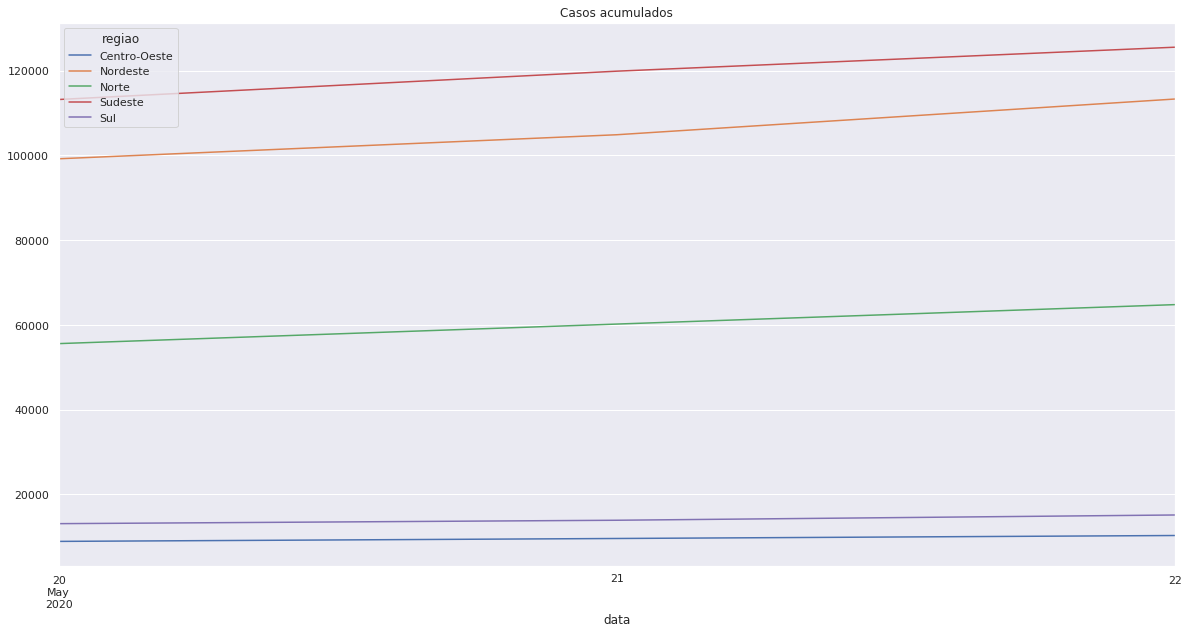

In [21]:
final_reg_df = regioes_df.pivot(columns="regiao")
final_reg_df["casosAcumulado"].plot(title="Casos acumulados")

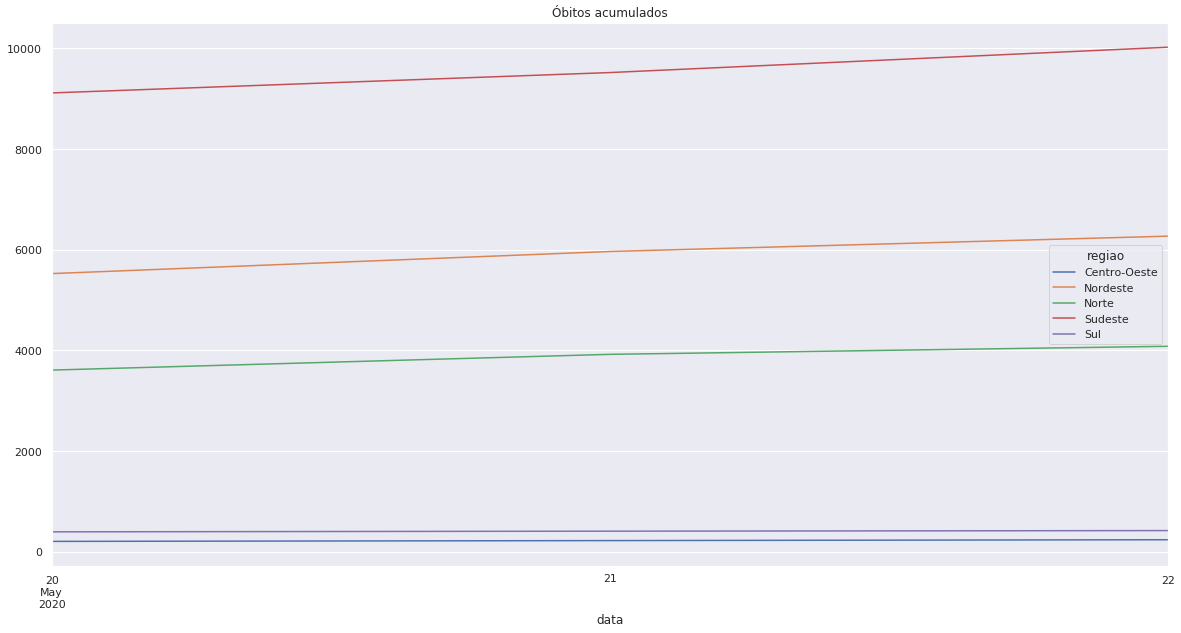

In [22]:
final_reg_df["obitosAcumulado"].plot(title="Óbitos acumulados")

# Visualização dos dados mais recentes

In [23]:
final_reg_df.iloc[-1]["casosAcumulado"]

regiao
Centro-Oeste     10249.0
Nordeste        113307.0
Norte            64763.0
Sudeste         125544.0
Sul              15095.0
Name: 2020-05-22 00:00:00, dtype: float64

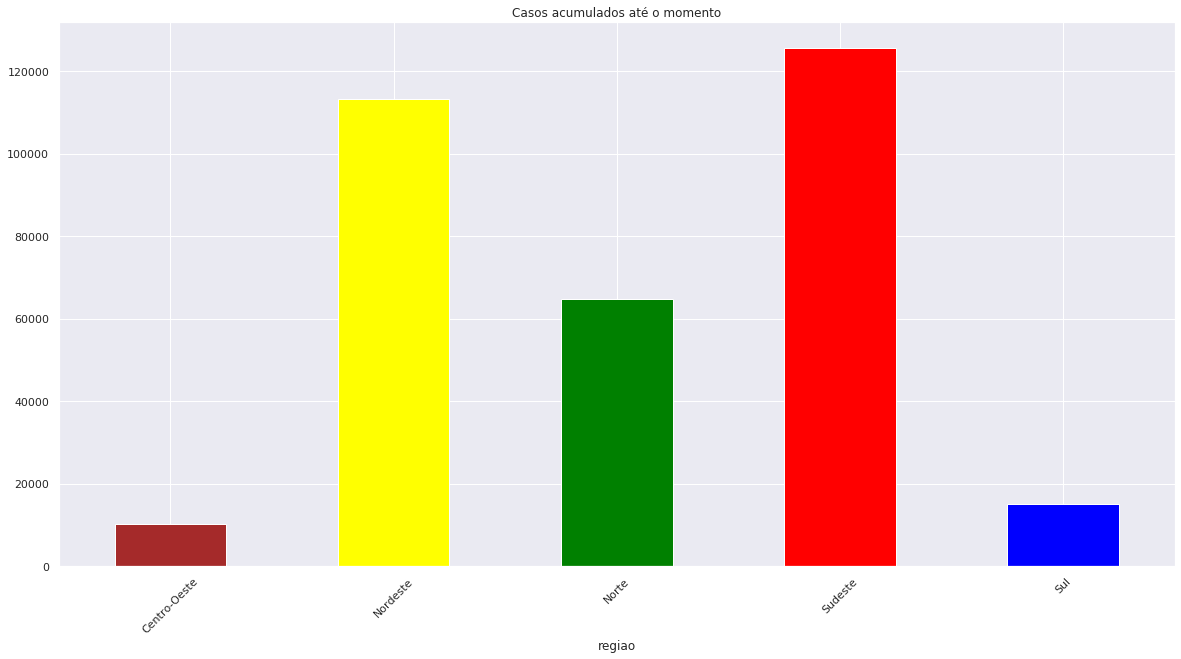

In [24]:
final_reg_df.iloc[-1]["casosAcumulado"].plot.bar(rot=45, color=["brown", "yellow", "green", "red", "blue", "pink"], title="Casos acumulados até o momento")

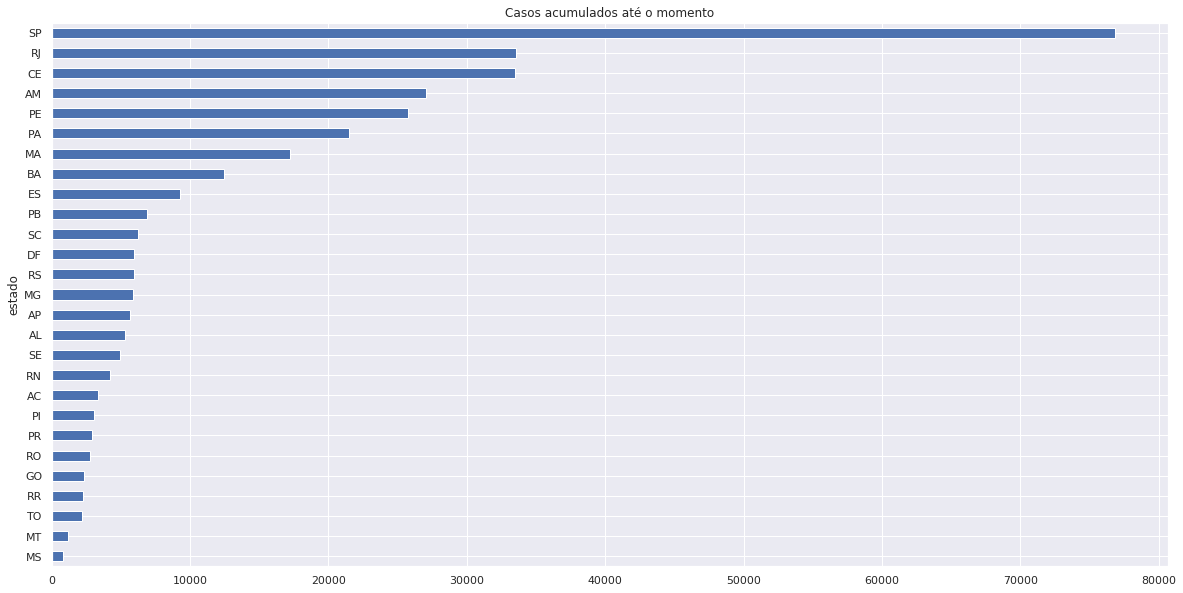

In [25]:
estados_df.iloc[-1]["casosAcumulado"].sort_values().plot.barh(title="Casos acumulados até o momento")

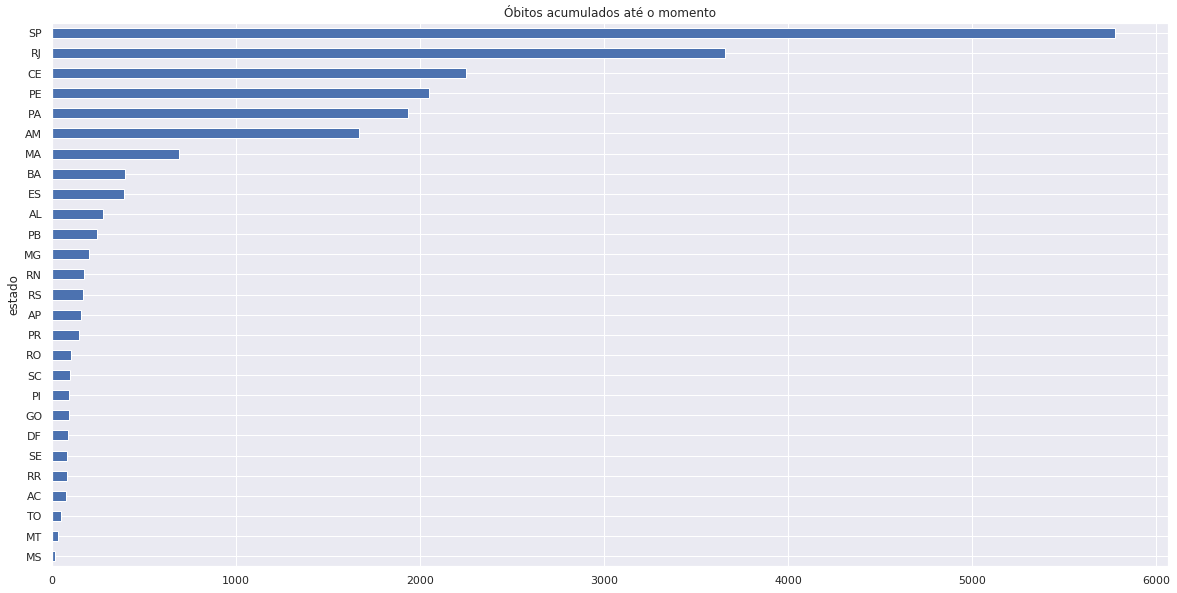

In [26]:
estados_df.iloc[-1]["obitosAcumulado"].sort_values().plot.barh(title="Óbitos acumulados até o momento")

In [27]:
estado2sigla = json.load(open("../dados/siglas_estados.json", "r"))
sigla2estado = {sigla : estado for (estado, sigla) in estado2sigla.items()}

In [28]:
estados = data_df["estado"].unique()[1:]

In [29]:
estado_summary = pd.DataFrame(index=estados)

In [30]:
estado_summary["casos"] = [estados_df.iloc[-1]["casosAcumulado"][estado] for estado in estados]
estado_summary["obitos"] = [estados_df.iloc[-1]["obitosAcumulado"][estado] for estado in estados]
estado_summary.rename(index=sigla2estado, inplace=True)

In [31]:
estado_summary

,casos,obitos
São Paulo,76815.0,5773.0
Rio de Janeiro,33582.0,3657.0
Bahia,12488.0,397.0
Espírito Santo,9274.0,394.0
Distrito Federal,5948.0,90.0
Alagoas,5273.0,277.0
Minas Gerais,5873.0,201.0
Rio Grande do Sul,5918.0,172.0
Pernambuco,25717.0,2050.0
Paraná,2939.0,146.0


In [32]:
estado_summary.to_excel("../dados/processados/casos_obitos_por_estado.xlsx")